In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
# do data aggregation work!
urls = {}
urls['math'] = "http://www2.ed.gov/about/inits/ed/edfacts/data-files/math-achievement-sch-sy2014-15.csv"
math_df = pd.read_csv(urls['math'])

In [ ]:
urls['reading'] = "http://www2.ed.gov/about/inits/ed/edfacts/data-files/rla-achievement-sch-sy2014-15.csv"
read_df = pd.read_csv(urls['reading'])

In [ ]:
math_df.columns

In [ ]:
read_df.columns

In [61]:
def fixProf(text):
    pair = text.split('-')
    if len(pair) > 1:   # average ranges
        return (int(pair[0]) + int(pair[1])) / (2 + 0.0)
    else:
        try:
            return float(text)
        except:
#             print text
            return -1

In [62]:
read_df['passing'] = read_df['ALL_RLA00PCTPROF_1415'].map(fixProf)

In [63]:
math_df['passing'] = math_df['ALL_MTH00PCTPROF_1415'].map(fixProf)

In [64]:
print math_df[math_df['passing'] == -1].shape
print read_df[read_df['passing'] == -1].shape

(7116, 232)
(5553, 232)


In [72]:
expCol = ['STNAM', 'passing']

In [73]:
mathPass = math_df[math_df['passing']!= -1][expCol]

In [74]:
readPass = read_df[read_df['passing']!= -1][expCol]

In [77]:
readPass.groupby(by=['STNAM']).mean().head(5)

,passing
STNAM,
ALABAMA,38.971803
ALASKA,38.608974
ARIZONA,37.816770
ARKANSAS,32.482966
CALIFORNIA,43.166032


In [78]:
mathPass.groupby(by=['STNAM']).mean().head(5)

,passing
STNAM,
ALABAMA,37.752267
ALASKA,34.545307
ARIZONA,37.159483
ARKANSAS,23.916925
CALIFORNIA,33.595457


In [87]:
mathPass.groupby(by=['STNAM']).mean()['passing'].to_csv('math_1415')
readPass.groupby(by=['STNAM']).mean()['passing'].to_csv('read_1415')

In [ ]:
import re
nw = re.compile('Northwood')

In [ ]:
import seaborn as sns

In [ ]:
validPassing[validPassing['SCHNAM'].apply(lambda x: True if nw.search(x) else False)][['SCHNAM', 'STNAM','passing']]

In [ ]:
validPassing[validPassing['STNAM'] == 'CALIFORNIA'][['SCHNAM', 'passing']].head(20)

In [ ]:
validPassing[validPassing['STNAM'] == 'IOWA']['passing'].hist()

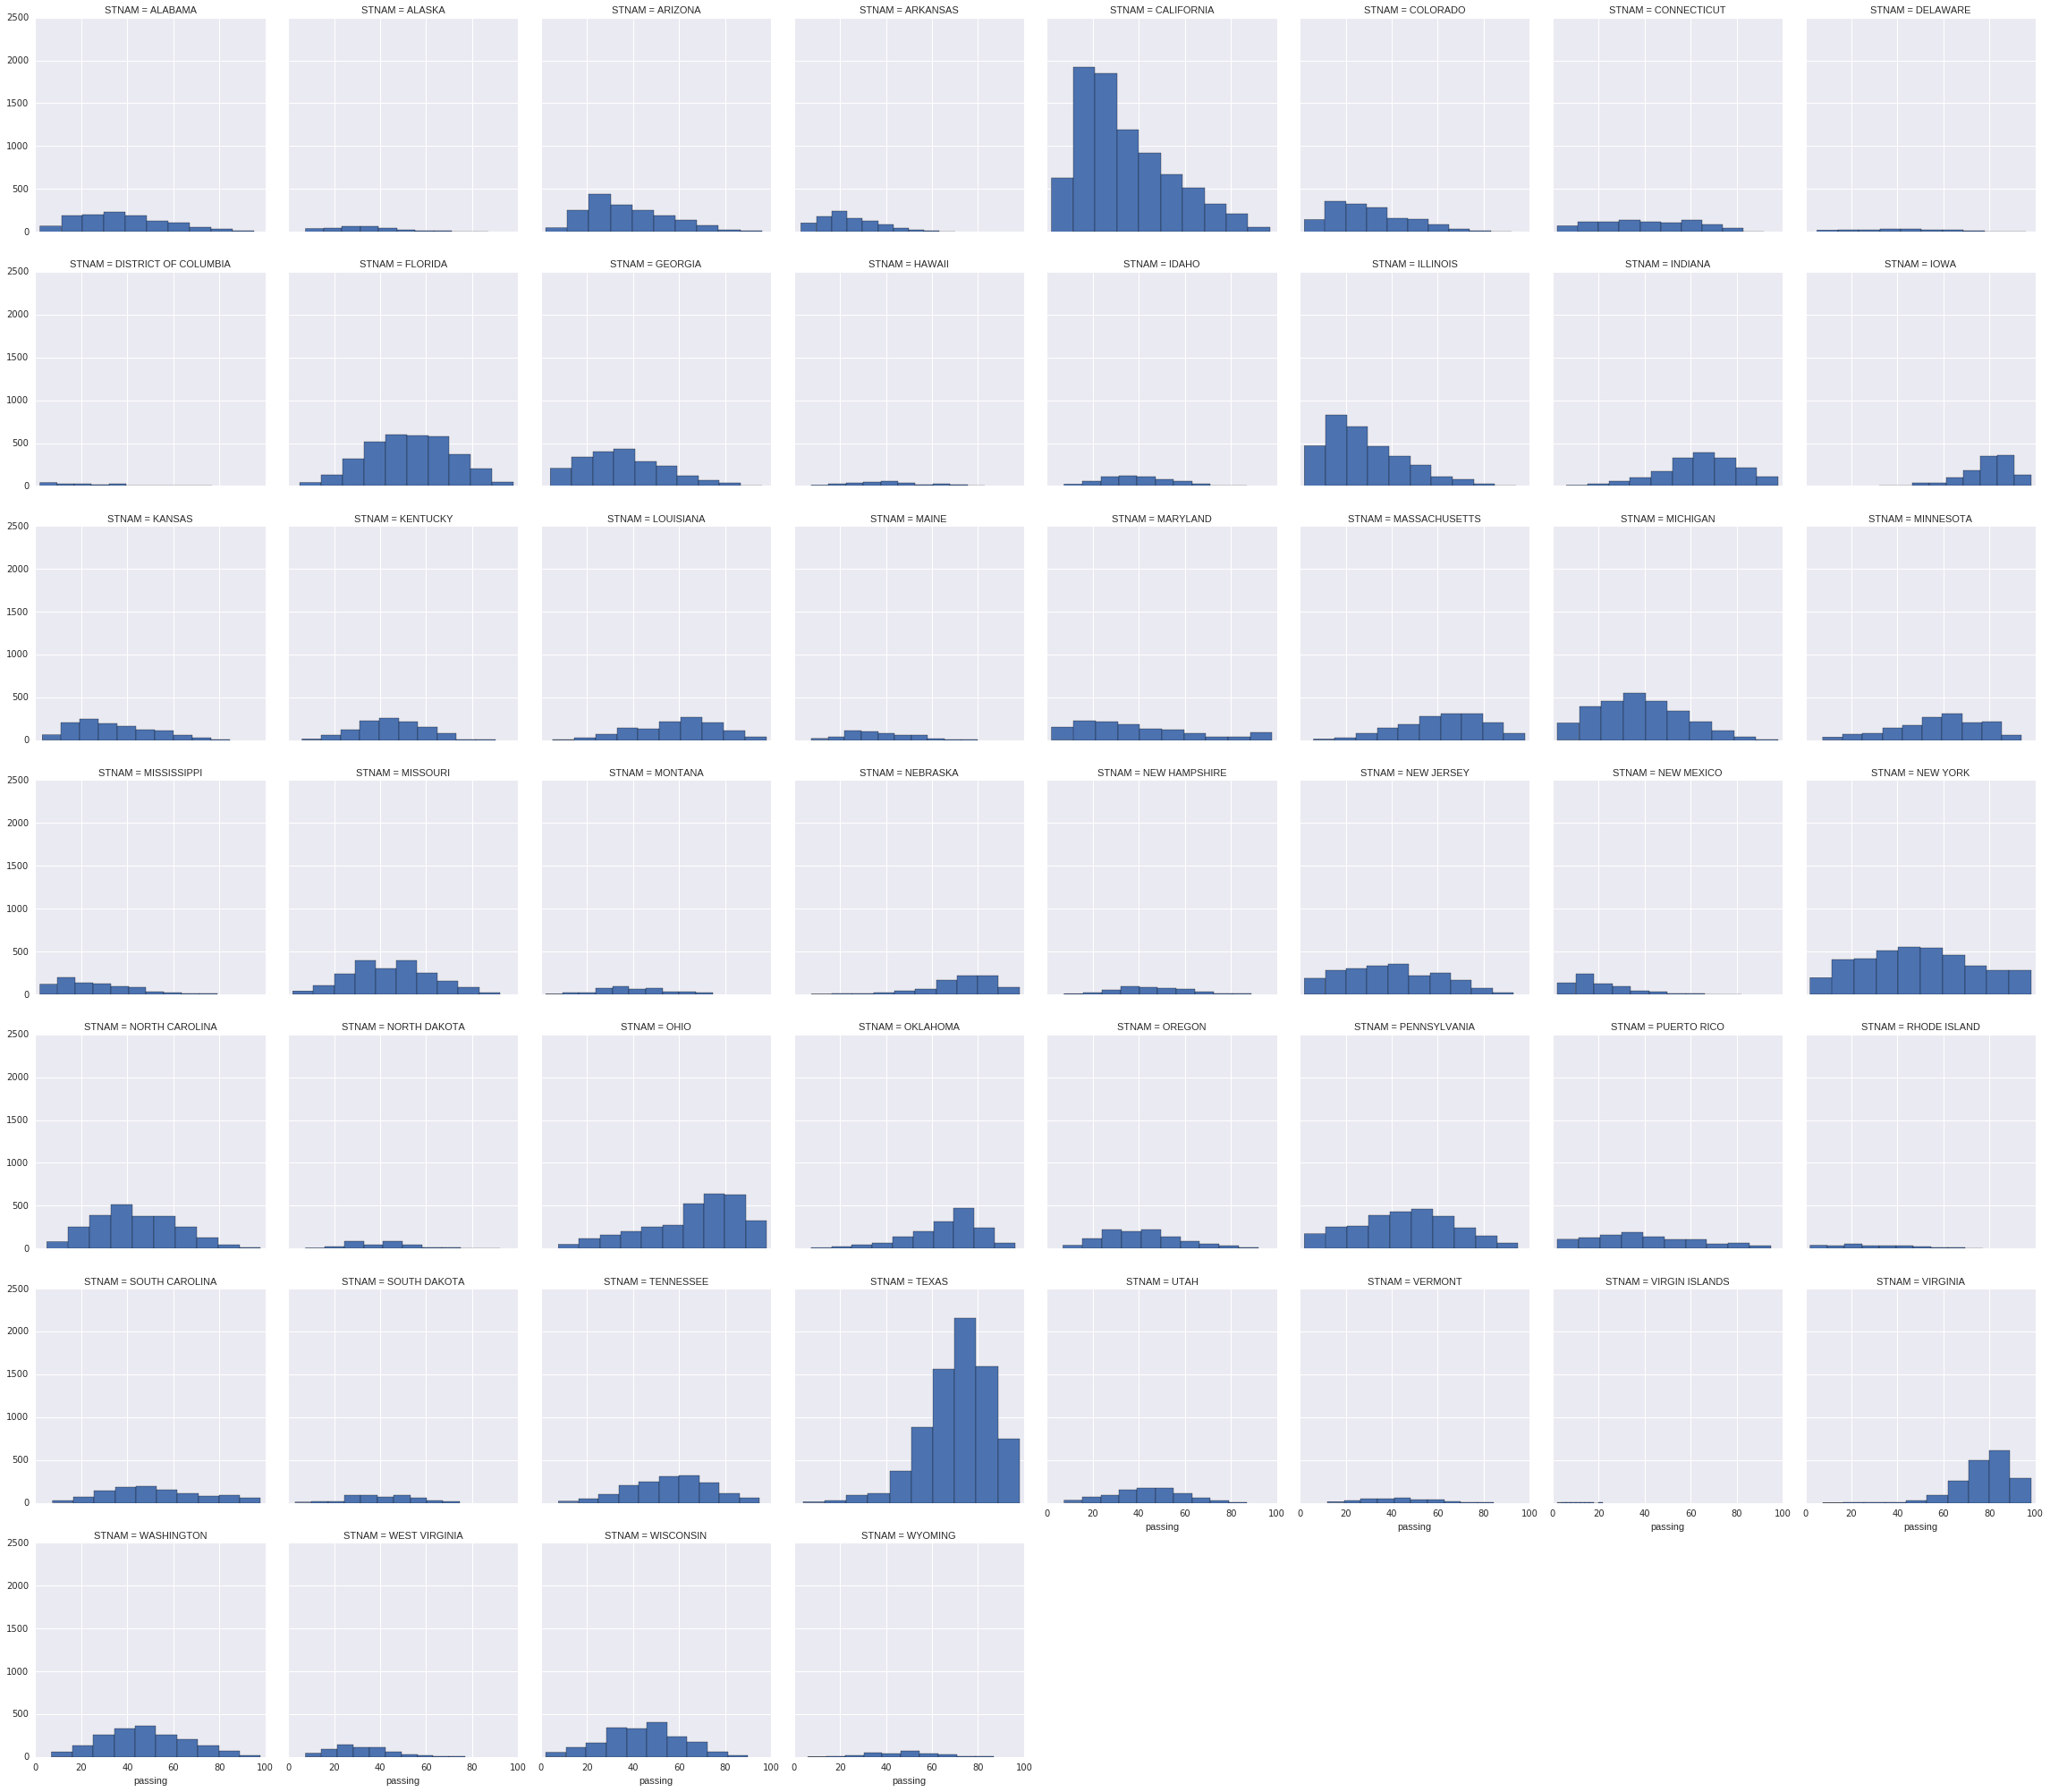

In [88]:
g = sns.FacetGrid(validPassing,col_wrap=8, size=4, col="STNAM")
g.map(plt.hist, "passing");

In [ ]:
validPassing.groupby(by='STNAM').median().sort_values('passing')

In [ ]:
validPassing.describe()

In [ ]:
math_df[math_df.columns[:10]].info()

In [ ]:
math_df.groupby(by=['STNAM']).mean()